In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all" 

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 4

import seaborn as sns
from sklearn import datasets

## linnerud
a multi variate regression

In [16]:
dataset = datasets.load_linnerud()
dataset.feature_names
print(dataset.DESCR)

['Chins', 'Situps', 'Jumps']

Linnerrud dataset

Notes
-----
Data Set Characteristics:
    :Number of Instances: 20
    :Number of Attributes: 3
    :Missing Attribute Values: None

The Linnerud dataset constains two small dataset:

- *exercise*: A list containing the following components: exercise data with
  20 observations on 3 exercise variables: Weight, Waist and Pulse.

- *physiological*: Data frame with 20 observations on 3 physiological variables:
   Chins, Situps and Jumps.

References
----------
  * Tenenhaus, M. (1998). La regression PLS: theorie et pratique. Paris: Editions Technic.



In [3]:
>>> X, y = dataset.data, dataset.target
print(X[:5])
print(y[:5])

[[  5. 162.  60.]
 [  2. 110.  60.]
 [ 12. 101. 101.]
 [ 12. 105.  37.]
 [ 13. 155.  58.]]
[[191.  36.  50.]
 [189.  37.  52.]
 [193.  38.  58.]
 [162.  35.  62.]
 [189.  35.  46.]]


In [4]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor(n_estimators=500)
clf.fit(X, y)

clf.predict([X[0]])
clf.predict([ np.array([2,110,43])  ])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

array([[188.524,  35.948,  51.012]])

array([[154.796,  34.296,  63.648]])

##### boston

In [5]:
boston = datasets.load_boston()
bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target
# bos.head()

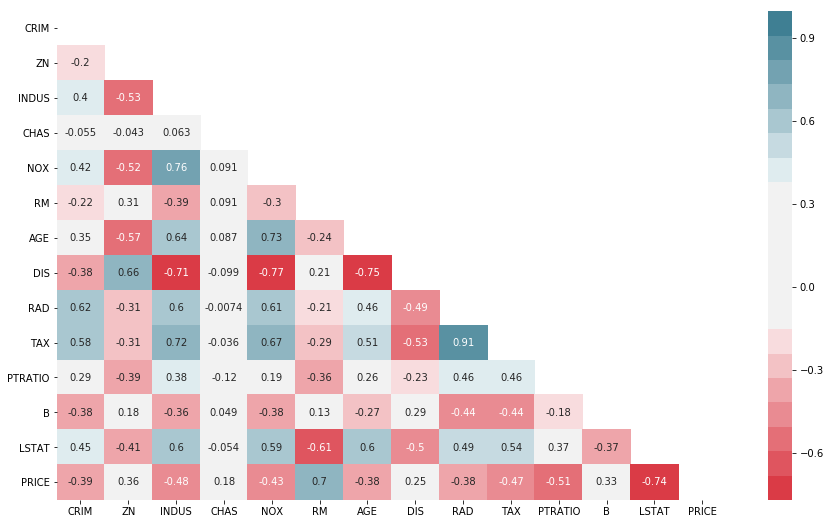

In [6]:
f, ax = plt.subplots(figsize=(15, 9))

# cmap ="YlGnBu"
cmap = sns.diverging_palette(10, 220, sep=80, n=20)
# cmap = sns.diverging_palette(220, 20, sep=20, as_cmap=True)
# cmap = sns.diverging_palette(220, 10, as_cmap=True)

corr = bos.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr,annot=True,cmap=cmap,mask=mask);

In [7]:
bos.corr(method='pearson').iloc[-1].sort_values(ascending=False)

PRICE      1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.385832
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: PRICE, dtype: float64

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

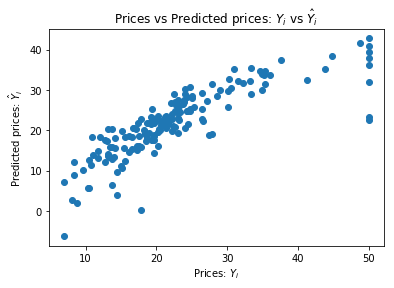

In [21]:
X = bos.drop('PRICE', axis = 1)
Y = bos['PRICE']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33, random_state = 5)

lm = LinearRegression()
lm.fit(X_train, Y_train)
Y_pred = lm.predict(X_test)

plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices vs Predicted prices: $Y_i$ vs $\hat{Y}_i$")
plt.scatter(Y_test, Y_pred);

In [25]:
pd.DataFrame(lm.coef_,index=X.columns,columns=['regression coefficient']).T
print("RMSE: {:.2f}\nR2 {:.2f}".format(mean_squared_error(Y_pred,Y_test) **.5,r2_score(Y_pred,Y_test)))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
regression coefficient,-0.156381,0.038549,-0.025063,0.78644,-12.946912,4.002689,-0.011602,-1.368288,0.341757,-0.013515,-0.988866,0.012059,-0.472644


RMSE: 5.86
R2 0.65


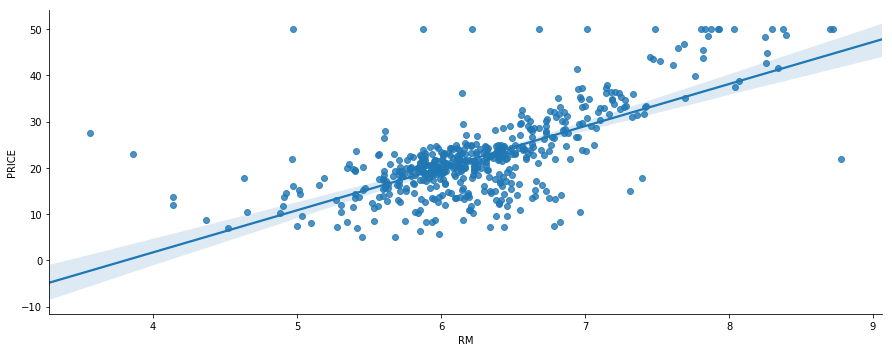

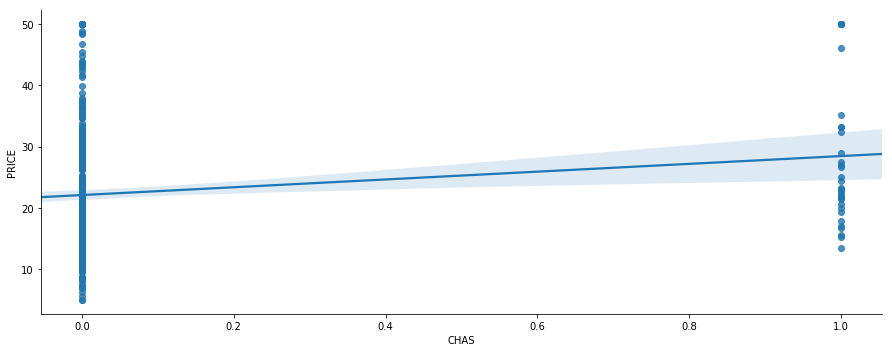

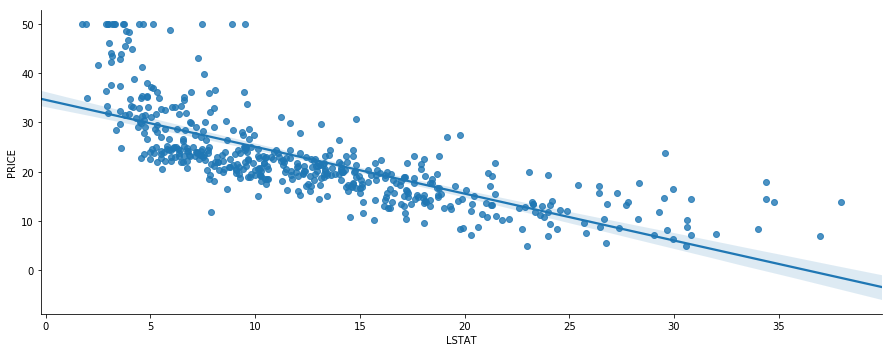

In [11]:
sns.lmplot(x="RM", y="PRICE", data=bos,aspect=2.5);
sns.lmplot(x="CHAS", y="PRICE", data=bos,aspect=2.5);
sns.lmplot(x="LSTAT", y="PRICE", data=bos,aspect=2.5);

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

<Figure size 864x432 with 0 Axes>

(-2.500224014336917, 52.50470430107526, -2.5, 52.5)

Text(0.5,0,'True price ($1000s)')

Text(0,0.5,'Predicted price ($1000s)')

RMSE: 2.83
R2 0.90
RMS: 2.83326153660915 


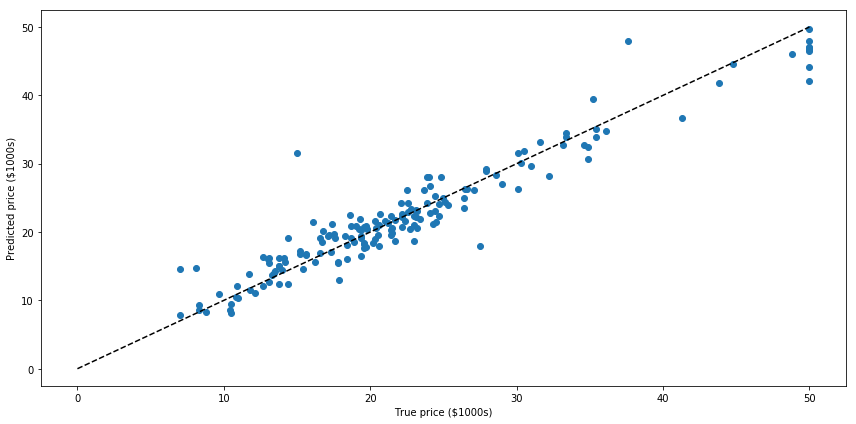

In [12]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

plt.figure(figsize=(12, 6))
plt.scatter(Y_test, Y_pred);
plt.plot([0, 50], [0, 50], '--k');
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
plt.tight_layout()
print("RMSE: {:.2f}\nR2 {:.2f}".format(mean_squared_error(Y_pred,Y_test) ** .5,r2_score(Y_pred,Y_test)))
print("RMS: %r " % np.sqrt(np.mean((Y_pred - Y_test) ** 2)))

In [20]:
#look at the values
df = X_test.copy(deep=True)

pd.options.mode.chained_assignment = None
df["act"] = Y_test
df["pred"] = Y_pred
df["err"] = (Y_pred - Y_test) / Y_test 
df.head(5)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,act,pred,err
226,0.38214,0.0,6.20,0.0,0.504,8.040,86.5,3.2157,8.0,307.0,17.4,387.38,3.13,37.6,47.887047,0.273592
292,0.03615,80.0,4.95,0.0,0.411,6.630,23.4,5.1167,4.0,245.0,19.2,396.90,4.70,27.9,28.868090,0.034699
90,0.04684,0.0,3.41,0.0,0.489,6.417,66.1,3.0923,2.0,270.0,17.8,392.18,8.81,22.6,22.919657,0.014144
373,11.10810,0.0,18.10,0.0,0.668,4.906,100.0,1.1742,24.0,666.0,20.2,396.90,34.77,13.8,12.397599,-0.101623
273,0.22188,20.0,6.96,1.0,0.464,7.691,51.8,4.3665,3.0,223.0,18.6,390.77,6.58,35.2,39.530541,0.123027


In [18]:
pd.DataFrame(clf.feature_importances_,index= X_train.columns,columns=["GradBstImp"])\
    .sort_values("GradBstImp",ascending=False).T
print(boston.DESCR)

abs(bos.corr(method='spearman').iloc[-1]).sort_values(ascending=False)

,DIS,LSTAT,RM,AGE,CRIM,B,NOX,TAX,PTRATIO,INDUS,RAD,ZN,CHAS
GradBstImp,0.166328,0.158305,0.147802,0.12592,0.074351,0.072805,0.060679,0.060352,0.059581,0.044295,0.021617,0.007579,0.000387


Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

PRICE      1.000000
LSTAT      0.852914
RM         0.633576
INDUS      0.578255
NOX        0.562609
TAX        0.562411
CRIM       0.557032
PTRATIO    0.555905
AGE        0.547562
DIS        0.445857
ZN         0.438179
RAD        0.346776
B          0.185664
CHAS       0.140612
Name: PRICE, dtype: float64

In [23]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print("RMSE: {:.2f}\nR2 {:.2f}".format(mean_squared_error(Y_pred,Y_test) ** .5,r2_score(Y_pred,Y_test)))
print("RMS: %r " % np.sqrt(np.mean((Y_pred - Y_test) ** 2)))

clf = DecisionTreeRegressor()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

print("RMSE: {:.2f}\nR2 {:.2f}".format(mean_squared_error(Y_pred,Y_test) ** .5,r2_score(Y_pred,Y_test)))
print("RMS: %r " % np.sqrt(np.mean((Y_pred - Y_test) ** 2)))


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

RMSE: 3.35
R2 0.84
RMS: 3.3531500070918208 


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

RMSE: 5.86
R2 0.65
RMS: 5.864257920494616 
